In [172]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><br><br><br><br><h1 style="font-size:4em;color:#2467C0">World Development Indicators</h1><br><br><br><br><br>

In [175]:
import pandas as pd
import numpy as np
import random

In [176]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [177]:
data.head(1)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907


In [196]:
# How many unique country names are there ?
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [197]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
print(countryCodes)

['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'FCS', 'HPC', 'HIC', 'NOC', 'OEC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS', 'SST', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'ADO', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'ZAR', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMY', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KSV', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR'

In [198]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [199]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

# Let us plot some parameters

In [347]:
# Filter 1

# Picks years of choice
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [348]:
# Filter 2 

# Pick 2 countries randomly
countryFilter = random.sample(countries, 2)

In [349]:
countryFilter

['East Asia & Pacific (all income levels)', 'Jordan']

In [350]:
# Filter 3

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Electricity production from hydroelectric sources (% of total)']

In [351]:
filteredData1 = []
filteredData2 = []

In [352]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''

while(len(filteredData1) < len(yearsFilter)-1):
    #pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


Skipping ... ['Female headed households (% of households with a female head)'] since very few rows (2) found
Skipping ... ['GDP, PPP (constant 2011 international $)'] since very few rows (5) found


In [353]:
len(filteredData1)

5

In [354]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

Skipping ... Fiji, since very few rows (5) found


In [355]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [356]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [357]:
filteredData1

,CountryName,IndicatorName,Year,Value
4859276,Sub-Saharan Africa (all income levels),"GDP, PPP (constant 2011 international $)",2010,2.742822e+12
5044842,Sub-Saharan Africa (all income levels),"GDP, PPP (constant 2011 international $)",2011,2.865160e+12
5221055,Sub-Saharan Africa (all income levels),"GDP, PPP (constant 2011 international $)",2012,2.968024e+12
5394575,Sub-Saharan Africa (all income levels),"GDP, PPP (constant 2011 international $)",2013,3.111669e+12
5544831,Sub-Saharan Africa (all income levels),"GDP, PPP (constant 2011 international $)",2014,3.265557e+12


In [358]:
filteredData2

,CountryName,IndicatorName,Year,Value
4912846,Fiji,"GDP, PPP (constant 2011 international $)",2010,6.697771e+09
5095471,Fiji,"GDP, PPP (constant 2011 international $)",2011,6.493470e+09
5270947,Fiji,"GDP, PPP (constant 2011 international $)",2012,6.599638e+09
5438990,Fiji,"GDP, PPP (constant 2011 international $)",2013,6.952811e+09
5575553,Fiji,"GDP, PPP (constant 2011 international $)",2014,7.435654e+09


In [359]:
ymin = min(filteredData1['Value'].min(), filteredData2['Value'].min())
ymax = max(filteredData1['Value'].max(), filteredData2['Value'].max())
limt = max(abs(ymin), abs(ymax))

In [372]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(filteredData1['Value'].min(), filteredData1['Value'].max())

ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend:
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle surrounding the legengframe = legend.get_frame()
frame.set_facecolor('.90')

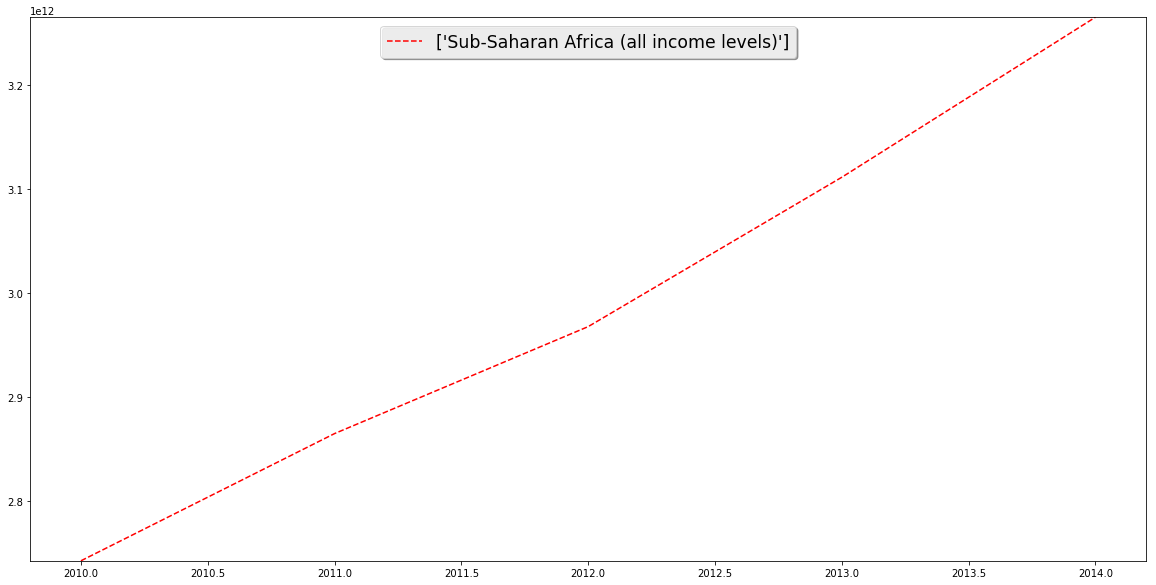

In [373]:
plt.show()

In [380]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(filteredData2['Value'].min(), filteredData2['Value'].max())

ax.plot(filteredData2['Year'], filteredData2['Value'] , 'b--', label=filteredData2['CountryName'].unique()) 


# Add the legend:
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle surrounding the legengframe = legend.get_frame()
frame.set_facecolor('.90')

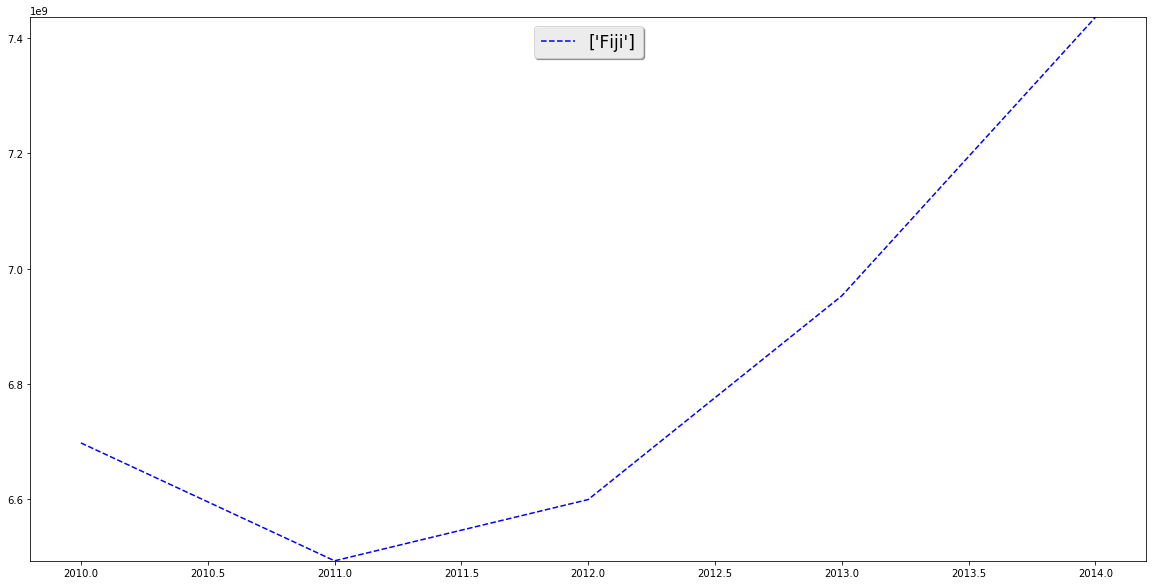

In [381]:
plt.show()